<a href="https://colab.research.google.com/github/fatemeh-ict/Deep-learnin/blob/main/eye_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 31.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [7]:
!pip install cvzone

In [8]:
import cv2 as cv
import numpy as np
from cvzone.FaceDetectionModule import FaceDetector
from cvzone.FaceMeshModule import FaceMeshDetector

In [9]:
detector=FaceDetector()
meshdetector=FaceMeshDetector()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  25460      0 --:--:-- --:--:-- --:--:-- 25615
left


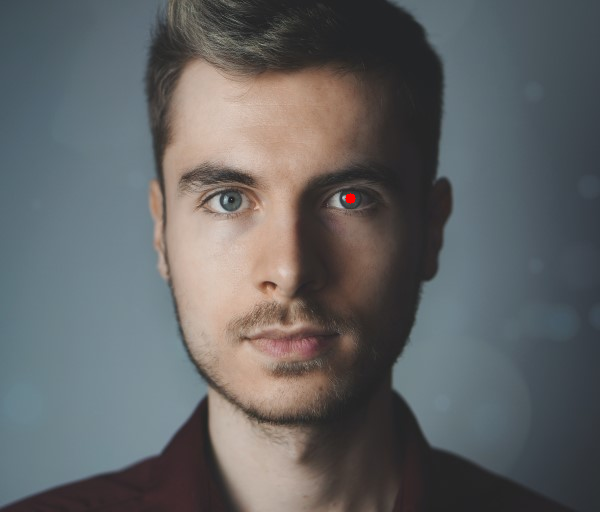

In [35]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
face_img = cv2.imread('/content/face.jpg')
face_img2=face_img.copy()

face_img,box=detector.findFaces(face_img)
face_img,faces=meshdetector.findFaceMesh(face_img)

#find num landmark
# if box:
  # center=box[0]['center']
  # if faces:
    # for i in range(0,len(faces[0])):
      # cv2.putText(face_img,str(i),(faces[0][i][0],faces[0][i][1]),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,0,255),1,cv2.LINE_AA)

left_eye =[362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385,384, 398]
if box:
    center = box[0]["center"]
    if faces:
        left_eye_points = np.array([[faces[0][p][0],faces[0][p][1]] for p in left_eye]) #coordinates of landmarks
        # cv.fillPoly(face_img2, pts=[left_eye_points], color = 255)
        (ex,ey,ew,eh)=cv.boundingRect(left_eye_points)
        # cv.rectangle(face_img2,(ex,ey),(ex+ew,ey+eh),(255,255,255))
        eye_roi=face_img2[ey:ey+eh,ex:ex+ew]  #crop eye
        eye_roi_gray=cv2.cvtColor(eye_roi,cv2.COLOR_BGR2GRAY)
        _,iris=cv2.threshold(eye_roi_gray,40,255,cv2.THRESH_BINARY_INV)
        contours, _ = cv.findContours(iris, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)
        if contours:
           (ix,iy,iw,ih) = cv.boundingRect(contours[0])
           ix_cntr, iy_centr = ix+int(iw/2) + ex, iy+int(ih/2)+ey
           cv2.circle(face_img2, (ix_cntr, iy_centr), 5, (0,0,255), -1)
#EYE TRACKING
           ix_cntr_e, iy_centr_e = ix+int(iw/2), iy+int(ih/2)
           if ix_cntr_e > int(ew/2):
            print("right")
           elif ix_cntr_e < int(ew/2):
            print("left")





# cv2_imshow(face_img)
cv2_imshow(face_img2)
# cv2_imshow(eye_roi_gray)
cv2_imshow(iris)


